# Lower WG Region Heat Budget
multiple grid cells

In [1]:
from dask.distributed import Client

client = Client("tcp://10.32.6.9:46331")
client

Client Scheduler: tcp://10.32.6.9:46331 Dashboard: /user/0000-0002-8176-9465/proxy/8787/status,Cluster Workers: 2 Cores: 4 Memory: 23.00 GB


In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
ocean_url = 'https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml'
ocean_cat = intake.Catalog(ocean_url)
ds = ocean_cat["SOSE"].to_dask()
ds

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 320, YG: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 438)
Coordinates:
    Depth     (YC, XC) float32 dask.array<shape=(320, 2160), chunksize=(320, 2160)>
    PHrefC    (Z) float32 dask.array<shape=(42,), chunksize=(42,)>
    PHrefF    (Zp1) float32 dask.array<shape=(43,), chunksize=(43,)>
  * XC        (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * XG        (XG) float32 5.551115e-17 0.16666667 ... 359.6667 359.83334
  * YC        (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * YG        (YG) float32 -77.9583 -77.79163 -77.62497 ... -24.9583 -24.791632
  * Z         (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * Zl        (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
  * Zp1       (Zp1) float32 0.0 -10.0 -21.0 -33.0 ... -5200.0 -5450.0 -5700.0
  * Zu        (Zu) float32 -10.0 -21.0 -33.0 -46.0 ... -5200.0 -5450.0 -5700.0
    drC       (Zp1) float32 dask.ar

In [4]:
coords = ds.coords.to_dataset().reset_coords() #ds split into coords
dsr = ds.reset_coords(drop=True) #ds dropping coords so it just holds data variables
dsr

<xarray.Dataset>
Dimensions:   (XC: 2160, XG: 2160, YC: 320, YG: 320, Z: 42, Zl: 42, Zp1: 43, Zu: 42, time: 438)
Coordinates:
  * XC        (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * XG        (XG) float32 5.551115e-17 0.16666667 ... 359.6667 359.83334
  * YC        (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * YG        (YG) float32 -77.9583 -77.79163 -77.62497 ... -24.9583 -24.791632
  * Z         (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * Zl        (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
  * Zp1       (Zp1) float32 0.0 -10.0 -21.0 -33.0 ... -5200.0 -5450.0 -5700.0
  * Zu        (Zu) float32 -10.0 -21.0 -33.0 -46.0 ... -5200.0 -5450.0 -5700.0
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables:
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<shape=(438, 42, 320, 2160), chunksize=(1, 42, 320, 2160)>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<shap

In [7]:
dsr.Z

<xarray.DataArray 'Z' (Z: 42)>
array([-5.0000e+00, -1.5500e+01, -2.7000e+01, -3.9500e+01, -5.3000e+01,
       -6.8000e+01, -8.5000e+01, -1.0400e+02, -1.2550e+02, -1.5000e+02,
       -1.7750e+02, -2.0850e+02, -2.4350e+02, -2.8300e+02, -3.2800e+02,
       -3.7950e+02, -4.3850e+02, -5.0600e+02, -5.8300e+02, -6.7100e+02,
       -7.7200e+02, -8.8800e+02, -1.0210e+03, -1.1735e+03, -1.3485e+03,
       -1.5495e+03, -1.7805e+03, -2.0460e+03, -2.3190e+03, -2.5750e+03,
       -2.8250e+03, -3.0750e+03, -3.3250e+03, -3.5750e+03, -3.8250e+03,
       -4.0750e+03, -4.3250e+03, -4.5750e+03, -4.8250e+03, -5.0750e+03,
       -5.3250e+03, -5.5750e+03], dtype=float32)
Coordinates:
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
Attributes:
    axis:           Z
    long_name:      vertical coordinate of cell center
    positive:       down
    standard_name:  depth
    units:          m

In [8]:
dsr.Zl

<xarray.DataArray 'Zl' (Zl: 42)>
array([    0.,   -10.,   -21.,   -33.,   -46.,   -60.,   -76.,   -94.,  -114.,
        -137.,  -163.,  -192.,  -225.,  -262.,  -304.,  -352.,  -407.,  -470.,
        -542.,  -624.,  -718.,  -826.,  -950., -1092., -1255., -1442., -1657.,
       -1904., -2188., -2450., -2700., -2950., -3200., -3450., -3700., -3950.,
       -4200., -4450., -4700., -4950., -5200., -5450.], dtype=float32)
Coordinates:
  * Zl       (Zl) float32 0.0 -10.0 -21.0 -33.0 ... -4950.0 -5200.0 -5450.0
Attributes:
    axis:               Z
    c_grid_axis_shift:  -0.5
    long_name:          vertical coordinate of upper cell interface
    positive:           down
    standard_name:      depth_at_upper_w_location
    units:              m

In [9]:
y_lower = 70
y_upper = 72
y_x_center = 1920

x_left = 1920
x_right = 1922
x_y_center = 70

z = [14, 43]

zl1 = 14
zl2 = 43

In [12]:
#set the boundaries
y_lat_range_lower = dict(YG=slice(y_lower, y_upper))
y_lon_range_lower = dict(XC=y_x_center)

x_lat_range_lower = dict(YC=x_y_center)
x_lon_range_lower = dict(XG=slice(x_left, x_right))

lower_cell_range = dict(Zl=[14, 42])
lower_cell_range_z = dict(Z=slice(14, 42))

In [36]:
#advective flux
adv_flux_y_lower = dsr.ADVy_TH.isel(**y_lon_range_lower, **y_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='YG').sum(dim='Z').load()
adv_flux_x_lower = dsr.ADVx_TH.isel(**x_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='XG').sum(dim='Z').load()
adv_flux_z_lower =  dsr.ADVr_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=14).load()

adv_flux_lower = adv_flux_x_lower + adv_flux_y_lower + adv_flux_z_lower
adv_flux_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438, XG: 1, YG: 1)>
array([[[-269.461   ]],

       [[  47.871338]],

       ...,

       [[-656.42487 ]],

       [[-931.25665 ]]], dtype=float32)
Coordinates:
  * XG       (XG) float32 320.1667
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    XC       float32 320.08334
  * YG       (YG) float32 -66.12497
    Zl       float32 -304.0

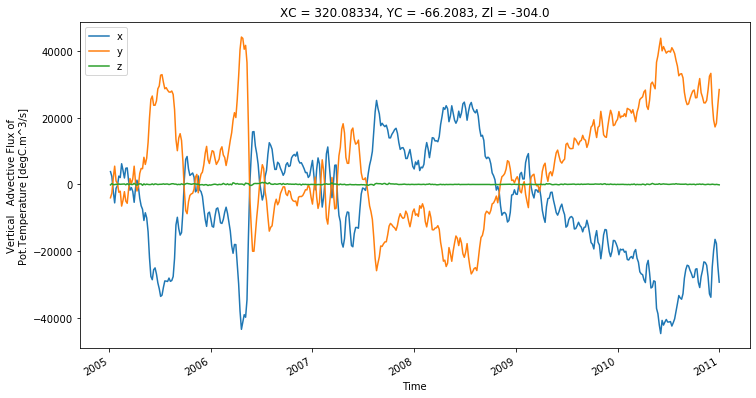

In [37]:
plt.figure(figsize=(12,6))

adv_flux_x_lower.plot(label='x')
adv_flux_y_lower.plot(label='y')
adv_flux_z_lower.plot(label='z')
plt.legend()

In [38]:
#diffusive flux
diff_flux_y_lower = dsr.DFyE_TH.isel(**y_lon_range_lower, **y_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='YG').sum(dim='Z').load()
diff_flux_x_lower = dsr.DFxE_TH.isel(**x_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='XG').sum(dim='Z').load()
diff_flux_z_lower =  (dsr.DFrE_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=14).load()
                     + dsr.DFrI_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=14).load()
                     + dsr.KPPg_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=14).load())

diff_flux_lower = diff_flux_x_lower + diff_flux_y_lower + diff_flux_z_lower
diff_flux_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438, XG: 1, YG: 1)>
array([[[  23.107786]],

       [[  28.4517  ]],

       ...,

       [[-658.59845 ]],

       [[-602.0453  ]]], dtype=float32)
Coordinates:
  * XG       (XG) float32 320.1667
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    XC       float32 320.08334
  * YG       (YG) float32 -66.12497
    Zl       float32 -304.0

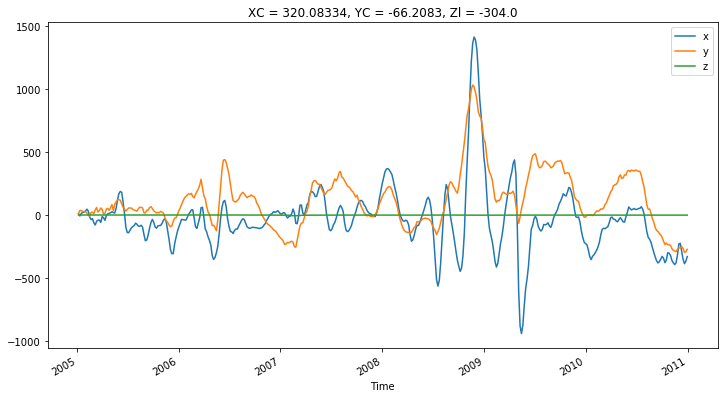

In [19]:
plt.figure(figsize=(12,6))
diff_flux_x_lower.plot(label='x')
diff_flux_y_lower.plot(label='y')
diff_flux_z_lower.plot(label='z')
plt.legend()

In [24]:
tottend_weddell_lower = ((dsr.TOTTTEND * coords.rA * coords.drF * coords.hFacC).isel(
                         **y_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).sum(
                                                                            dim=['Z']))/ (24*60*60)
tottend_weddell_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438)>
array([ 246.352963,  -76.322928,  121.743403, ...,    1.817187, 1315.022778,
       1533.301481])
Coordinates:
    XC       float32 320.08334
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31

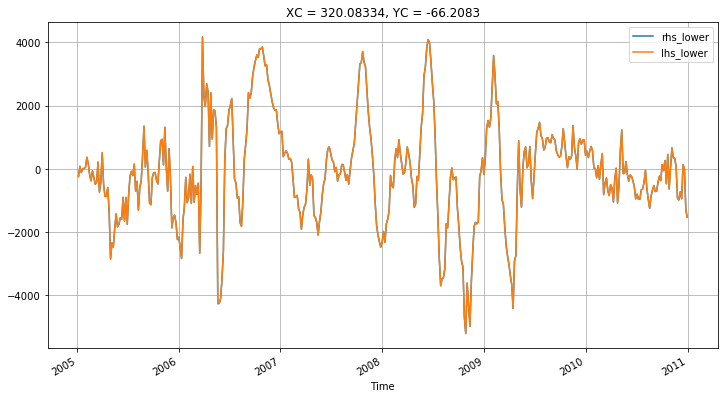

In [39]:
plt.figure(figsize=(12,6))
rhs_lower = adv_flux_lower + diff_flux_lower
lhs_lower =  - tottend_weddell_lower
rhs_lower.plot(label='rhs_lower')
lhs_lower.plot(label='lhs_lower')
plt.legend()
plt.grid();
# tried dividing by 24 (too big), then 24*60 (still too big but better), then 24*60*60 but then it's 0. 

In [27]:
dsr.TOTTTEND

<xarray.DataArray 'TOTTTEND' (time: 438, Z: 42, YC: 320, XC: 2160)>
dask.array<shape=(438, 42, 320, 2160), dtype=float32, chunksize=(1, 42, 320, 2160)>
Coordinates:
  * XC       (XC) float32 0.083333336 0.25 0.4166667 ... 359.75 359.9167
  * YC       (YC) float32 -77.87497 -77.7083 -77.54163 ... -24.874966 -24.7083
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Attributes:
    long_name:      Tendency of Potential Temperature
    standard_name:  TOTTTEND
    units:          degC/day

In [28]:
dsr.TOTTTEND.XC[20]

<xarray.DataArray 'XC' ()>
array(3.416667, dtype=float32)
Coordinates:
    XC       float32 3.4166667
Attributes:
    axis:           X
    coordinate:     YC XC
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [30]:
dsr.TOTTTEND.YC[70]

<xarray.DataArray 'YC' ()>
array(-66.2083, dtype=float32)
Coordinates:
    YC       float32 -66.2083
Attributes:
    axis:           Y
    coordinate:     YC XC
    long_name:      latitude
    standard_name:  latitude
    units:          degrees_north

In [31]:
dsr.TOTTTEND.isel(XC=20, YC=70)

<xarray.DataArray 'TOTTTEND' (time: 438, Z: 42)>
dask.array<shape=(438, 42), dtype=float32, chunksize=(1, 42)>
Coordinates:
    XC       float32 3.4166667
    YC       float32 -66.2083
  * Z        (Z) float32 -5.0 -15.5 -27.0 -39.5 ... -5075.0 -5325.0 -5575.0
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Attributes:
    long_name:      Tendency of Potential Temperature
    standard_name:  TOTTTEND
    units:          degC/day

In [35]:
coords.Depth.isel(XC=20, YC=70).values


array(3628.1272, dtype=float32)

# 1-42

In [40]:
y_lower = 70
y_upper = 72
y_x_center = 1920

x_left = 1920
x_right = 1922
x_y_center = 70

z = [1, 42]

zl1 = 1
zl2 = 42

In [41]:
#set the boundaries
y_lat_range_lower = dict(YG=slice(y_lower, y_upper))
y_lon_range_lower = dict(XC=y_x_center)

x_lat_range_lower = dict(YC=x_y_center)
x_lon_range_lower = dict(XG=slice(x_left, x_right))

lower_cell_range = dict(Zl=[1, 42])
lower_cell_range_z = dict(Z=slice(1, 42))

In [42]:
#advective flux
adv_flux_y_lower = dsr.ADVy_TH.isel(**y_lon_range_lower, **y_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='YG').sum(dim='Z').load()
adv_flux_x_lower = dsr.ADVx_TH.isel(**x_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='XG').sum(dim='Z').load()
adv_flux_z_lower =  dsr.ADVr_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=1).load()

adv_flux_lower = adv_flux_x_lower + adv_flux_y_lower + adv_flux_z_lower
adv_flux_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438, XG: 1, YG: 1)>
array([[[  905.29095]],

       [[-1126.0587 ]],

       ...,

       [[-1148.523  ]],

       [[ -776.08813]]], dtype=float32)
Coordinates:
  * XG       (XG) float32 320.1667
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    XC       float32 320.08334
  * YG       (YG) float32 -66.12497
    Zl       float32 -10.0

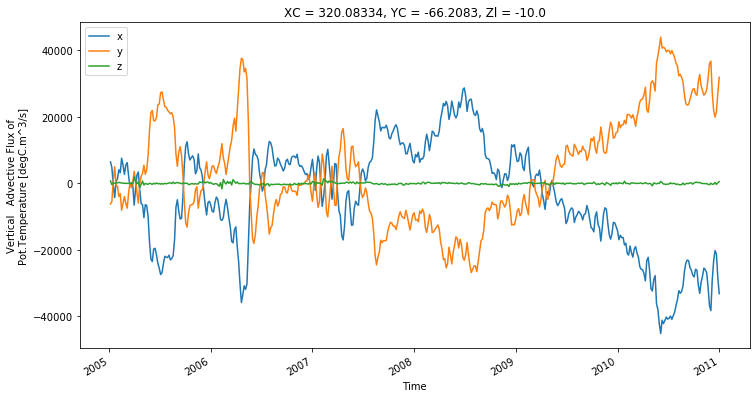

In [43]:
plt.figure(figsize=(12,6))

adv_flux_x_lower.plot(label='x')
adv_flux_y_lower.plot(label='y')
adv_flux_z_lower.plot(label='z')
plt.legend()

In [44]:
#diffusive flux
diff_flux_y_lower = dsr.DFyE_TH.isel(**y_lon_range_lower, **y_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='YG').sum(dim='Z').load()
diff_flux_x_lower = dsr.DFxE_TH.isel(**x_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).diff(
                                                                                  dim='XG').sum(dim='Z').load()
diff_flux_z_lower =  (dsr.DFrE_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=1).load()
                     + dsr.DFrI_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=1).load()
                     + dsr.KPPg_TH.isel(**y_lon_range_lower, **x_lat_range_lower, Zl=1).load())

diff_flux_lower = diff_flux_x_lower + diff_flux_y_lower + diff_flux_z_lower
diff_flux_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438, XG: 1, YG: 1)>
array([[[  -45.71881]],

       [[-2352.3997 ]],

       ...,

       [[ -824.8005 ]],

       [[ -743.5644 ]]], dtype=float32)
Coordinates:
  * XG       (XG) float32 320.1667
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
    XC       float32 320.08334
  * YG       (YG) float32 -66.12497
    Zl       float32 -10.0

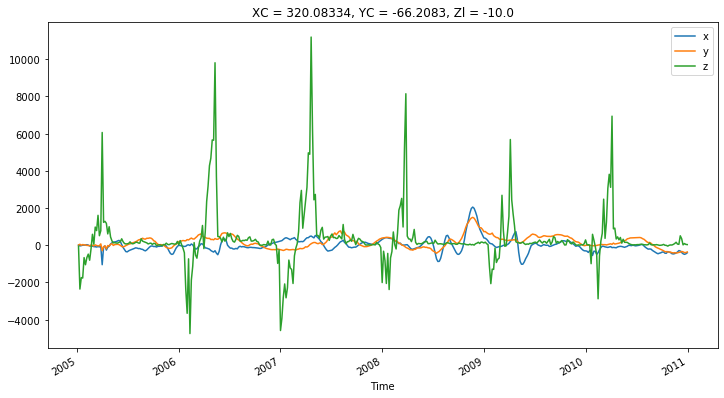

In [45]:
plt.figure(figsize=(12,6))
diff_flux_x_lower.plot(label='x')
diff_flux_y_lower.plot(label='y')
diff_flux_z_lower.plot(label='z')
plt.legend()

In [46]:
tottend_weddell_lower = ((dsr.TOTTTEND * coords.rA * coords.drF * coords.hFacC).isel(
                         **y_lon_range_lower, **x_lat_range_lower, **lower_cell_range_z).sum(
                                                                            dim=['Z']))/ (24*60*60)
tottend_weddell_lower.load()
#units: (˚C m^3)/s

<xarray.DataArray (time: 438)>
array([ 780.760741, 5249.798519, 2994.861296, ..., 1267.836204, 2489.592037,
       2524.044815])
Coordinates:
    XC       float32 320.08334
    YC       float32 -66.2083
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31

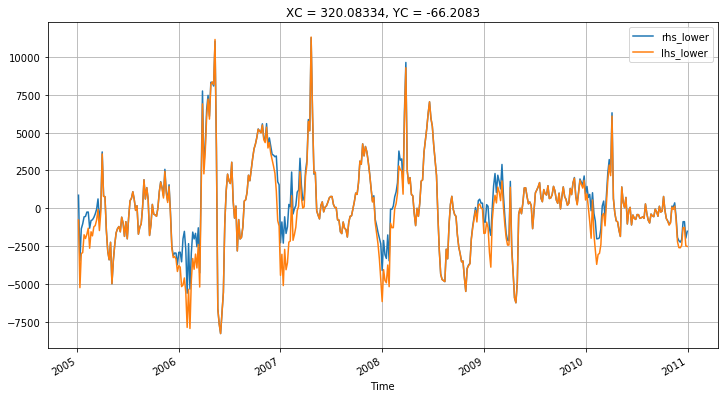

In [47]:
plt.figure(figsize=(12,6))
rhs_lower = adv_flux_lower + diff_flux_lower
lhs_lower =  - tottend_weddell_lower
rhs_lower.plot(label='rhs_lower')
lhs_lower.plot(label='lhs_lower')
plt.legend()
plt.grid();
# tried dividing by 24 (too big), then 24*60 (still too big but better), then 24*60*60 but then it's 0. 